## Step 1 Construct features using NLTK

In [1]:
import nltk
from nltk.corpus import stopwords
import string

import json


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1025.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}


In [2]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [3]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [4]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [5]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [6]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [7]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [8]:
def getAverageSentenceLength(sents):
    results = 0
    for s in sents:        
        results += len(s)
    return results/len(sents)


In [9]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [10]:
def getNumberOfPronoun(sentences):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
    for s in sentences:        
        for p in pronouns:
            count += s.count(p)
    
    return count

In [11]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [12]:
def getNumberOfConjunction(sents):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        for c in conjunctions:
            count += s.count(c)
    
    return count

In [13]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division

# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(sentences)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(sentences)/normalizer)
        

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

223


,DisLegomena,HapaxLegomena,averageSentenceLength,numberOfConjunction,numberOfPronoun,numberOfSentences,numberUniqueWords
act,,,,,,,
THE WINTER'S TALE ACT III,0.032110,0.140138,70.587413,0.145413,0.191743,286,0.211697
KING RICHARD THE SECOND ACT V.,0.023444,0.108635,57.026971,0.134885,0.172197,482,0.175995
THE FIRST PART OF KING HENRY THE FOURTH ACT1598,0.062963,0.296296,54.680000,0.118519,0.188889,25,0.388889
THE MERCHANT OF VENICE ACT1597,0.061728,0.259259,456.000000,0.053498,0.251029,3,0.353909
THE FIRST PART OF KING HENRY THE FOURTH ACT II.,0.020947,0.086251,36.823741,0.139542,0.179485,1112,0.144676


In [14]:
# Filter out wierd acts, e.g. the beginning of a play

df = df[df['averageSentenceLength'] < 168]
df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
        'averageSentenceLength', 'numberOfPronoun', 'numberOfConjunction']]

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


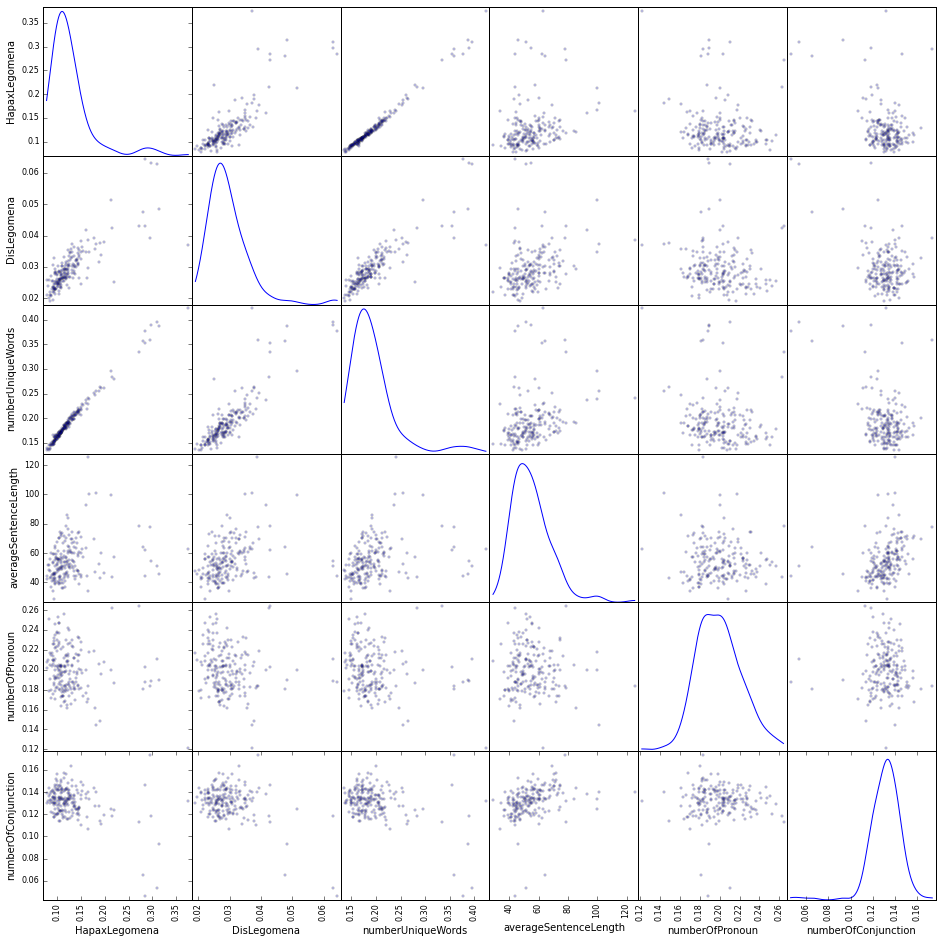

In [15]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

## Step 2 Construct n-grams using sklearn

In [16]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np

In [18]:
# excluding stop words, n-grams is an input
def getTfidf(ngram_range):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X_counts = count_vect.fit_transform(text)

    tfidf_transformer = TfidfTransformer(use_idf=True).fit(X_counts)
    X_tfidf = tfidf_transformer.transform(X_counts)
    return X_tfidf

In [20]:
randomState = np.random.seed(1)

def getSVD(X_tfidf, n_components):
    
    svd = TruncatedSVD(n_components = n_components, random_state = randomState)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    X = lsa.fit_transform(X_tfidf)

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    
    return X

def clusterDocuments(X, n_clusters):

    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=5, random_state = randomState)
    km.fit_predict(X)    
    return km.labels_

def printClusters(labels):
    for i in set(labels):
        index = np.squeeze(np.argwhere(labels == i)).tolist()
        print(index)
    
        print(np.array(title)[index])
        print('\n')

# Cluster only using n-grams as features
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 20)
labels = clusterDocuments(X, n_clusters = 20)
printClusters(labels)

Explained variance of the SVD step: 11%
[86, 104, 135, 141, 149]
['THE MERRY WIVES OF WINDSOR ACT II.' 'THE MERRY WIVES OF WINDSOR ACT IV.'
 'THE MERRY WIVES OF WINDSOR ACT V. ' 'THE MERRY WIVES OF WINDSOR ACT III'
 'THE MERRY WIVES OF WINDSOR ACT I. ']


[9, 31, 37, 45, 62, 82, 89, 98, 137, 142, 148, 160, 176]
['MUCH ADO ABOUT NOTHING ACT II.' 'MUCH ADO ABOUT NOTHING ACT III'
 'THE TRAGEDY OF ROMEO AND JULIET ACT III'
 'THE LIFE OF KING HENRY THE FIFTH ACT III'
 'THE LIFE OF TIMON OF ATHENS ACT IV.' 'MUCH ADO ABOUT NOTHING ACT V. '
 'THE TRAGEDY OF ROMEO AND JULIET ACT V. '
 'THE TRAGEDY OF ROMEO AND JULIET ACT II.'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT IV.'
 'MUCH ADO ABOUT NOTHING ACT I. ' 'THE TEMPEST ACT I. '
 'THE TRAGEDY OF CORIOLANUS ACT II.' "A MIDSUMMER NIGHT'S DREAM ACT II."]


[1, 26, 47, 91, 127, 154, 163]
['KING RICHARD THE SECOND ACT V. ' 'KING RICHARD THE SECOND ACT III'
 'KING RICHARD THE SECOND ACT II.' 'KING RICHARD III ACT IV.'
 'KING RICHARD III ACT V. ' 'KING 

> By only using n-grams + td-idf + SVD (20 components), acts are grouped mainly according to their topics. Acts of the same play go to the same cluster.

## Step 3 Combine n-grams and other features

In [21]:
# Features from n-grams, use fewer components
X = getSVD(X_tfidf, n_components = 6)
df_ngrams = pd.DataFrame(data=X, index = title)
df_ngrams.head()

Explained variance of the SVD step: 3%


,0,1,2,3,4,5
THE WINTER'S TALE ACT III,0.232900,-0.376125,-0.199896,-0.181863,0.331658,-0.788199
KING RICHARD THE SECOND ACT V.,0.236638,-0.321617,-0.231655,-0.222113,0.767585,0.385202
THE FIRST PART OF KING HENRY THE FOURTH ACT1598,0.533574,-0.478149,-0.260606,-0.252675,-0.073398,-0.591207
THE FIRST PART OF KING HENRY THE FOURTH ACT II.,0.516682,-0.390328,-0.053271,-0.241878,0.720434,0.017766
THE FIRST PART OF KING HENRY THE FOURTH ACT IV.,0.792971,-0.349672,-0.212676,0.056582,0.422480,-0.148340


In [22]:
# Merge all features
df_all = df.join(df_ngrams)
df_all.head()

,HapaxLegomena,DisLegomena,numberUniqueWords,averageSentenceLength,numberOfPronoun,numberOfConjunction,0,1,2,3,4,5
act,,,,,,,,,,,,
THE WINTER'S TALE ACT III,0.140138,0.032110,0.211697,70.587413,0.191743,0.145413,0.232900,-0.376125,-0.199896,-0.181863,0.331658,-0.788199
KING RICHARD THE SECOND ACT V.,0.108635,0.023444,0.175995,57.026971,0.172197,0.134885,0.236638,-0.321617,-0.231655,-0.222113,0.767585,0.385202
THE FIRST PART OF KING HENRY THE FOURTH ACT1598,0.296296,0.062963,0.388889,54.680000,0.188889,0.118519,0.533574,-0.478149,-0.260606,-0.252675,-0.073398,-0.591207
THE FIRST PART OF KING HENRY THE FOURTH ACT II.,0.086251,0.020947,0.144676,36.823741,0.179485,0.139542,0.516682,-0.390328,-0.053271,-0.241878,0.720434,0.017766
THE FIRST PART OF KING HENRY THE FOURTH ACT IV.,0.153945,0.034952,0.226934,57.441935,0.173477,0.146235,0.792971,-0.349672,-0.212676,0.056582,0.422480,-0.148340


## Step 4 Clustering

In [23]:
# Cluster using all features
X = df_all.values
labels = clusterDocuments(X, n_clusters = 8)
printClusters(labels)

[1, 2, 4, 15, 16, 22, 23, 30, 32, 36, 40, 42, 43, 44, 51, 52, 54, 56, 59, 60, 62, 70, 71, 75, 77, 78, 81, 85, 88, 91, 93, 95, 115, 117, 135, 136, 144, 145, 146, 148, 150, 151, 160, 161, 177, 181, 183, 184]
['KING RICHARD THE SECOND ACT V. '
 'THE FIRST PART OF KING HENRY THE FOURTH ACT1598'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT IV.'
 'ALLS WELL THAT ENDS WELL ACT IV ' 'THE MERCHANT OF VENICE ACT IV.'
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT I. '
 'MUCH ADO ABOUT NOTHING ACT1599' 'THE COMEDY OF ERRORS ACT V. '
 'CYMBELINE ACT III' 'THE TRAGEDY OF ANTONY AND CLEOPATRA ACT V. '
 "A MIDSUMMER NIGHT'S DREAM ACT III" 'THE TRAGEDY OF JULIUS CAESAR ACT I. '
 'ALLS WELL THAT ENDS WELL ACT V S' 'AS YOU LIKE IT ACT V. '
 'SECOND PART OF KING HENRY IV ACT V. ' 'THE TAMING OF THE SHREW ACT Il.'
 'THE TRAGEDY OF TITUS ANDRONICUS ACT IV.'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT V. '
 'THE MERCHANT OF VENICE ACT II.' 'THE TRAGEDY OF MACBETH ACT I. '
 'THE LIFE OF TIMON OF ATHENS ACT 

In [24]:
df_all.to_excel('all feature-v1026.xlsx')